In [1]:
import matplotlib.pyplot as plt
import numpy as np


from utils import *
from ardca import *
from classes import *

In [2]:
N_SEQ = 11000

In [3]:
msa_path = "../data/PF00014_mgap6.fasta.gz"
alignment = read_fasta_alignment(msa_path, max_gap_fraction=1.0)
alignment2d, _ = pca_from_onehot(alignment)

# Principal Components Analysis on Samples: Comparing the MSA Sequences with Model Generated Sequences

In [4]:
# sample from MSA
random_indices = np.random.choice(alignment2d.shape[0], size=N_SEQ, replace=False)
random_msa_samples = alignment2d[random_indices]

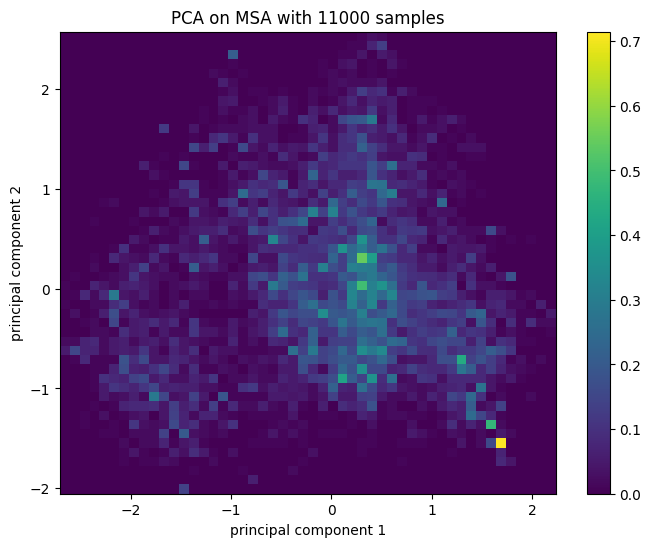

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
h = ax.hist2d(
    random_msa_samples[:, 0],
    random_msa_samples[:, 1],
    bins=50,
    density=True,
)

ax.set(
    title=f"PCA on MSA with {N_SEQ} samples",
    xlabel="principal component 1",
    ylabel="principal component 2",
)

plt.colorbar(h[3], ax=ax)
plt.show()

In [6]:
# sample sequences from model
model = load_ardca_model("ardca_model.pt")
generated_seqs = model.sample(n_samples=N_SEQ)

In [7]:
pca_generated, _ = pca_from_onehot(generated_seqs)

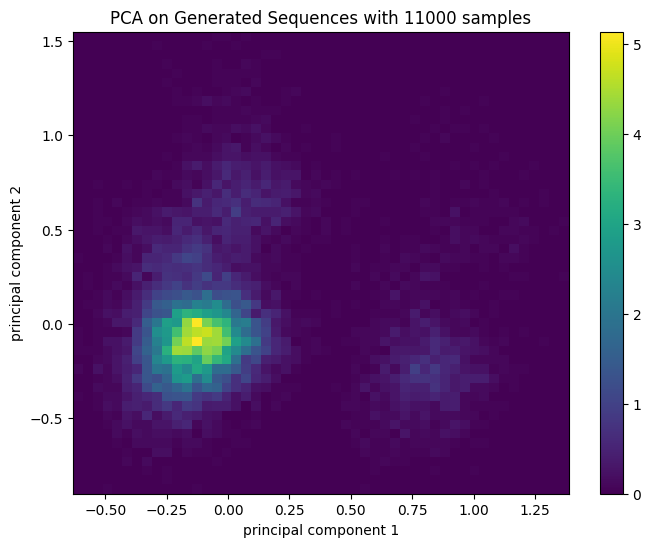

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
h = ax.hist2d(
    pca_generated[:, 0],
    pca_generated[:, 1],
    bins=50,
    density=True,
)

ax.set(
    title=f"PCA on Generated Sequences with {N_SEQ} samples",
    xlabel="principal component 1",
    ylabel="principal component 2",
)

plt.colorbar(h[3], ax=ax)
plt.show()

# Pearson Correlation Between Empirical and Model-Generated Connected Correlations 